In [343]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix
import itertools

In [88]:
train = pd.read_csv('/home/dipanjana/Documents/Kaggle/Titanic/train.csv')
test = pd.read_csv('/home/dipanjana/Documents/Kaggle/Titanic/test.csv')

In [89]:
#Training Data

In [90]:
#First few rows of training dataset
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [91]:
#Total no. of rows and columns in training dataset
train.shape

(891, 12)

In [92]:
#Mathematically describing numerical variables of training dataset
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [93]:
#Describing non-numerical variables
train.describe(include = ['O']).transpose()

,count,unique,top,freq
Name,891,891,"Yousif, Mr. Wazli",1
Sex,891,2,male,577
Ticket,891,681,CA. 2343,7
Cabin,204,147,B96 B98,4
Embarked,889,3,S,644


In [94]:
#Basic info about the variables of training dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [95]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [96]:
#Test Data

In [97]:
#First few records
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [98]:
#Total no. of rows and columns:
test.shape

#Target variable 'Survived' is not present in test data

(418, 11)

In [99]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [100]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [101]:
#Determining relationship between target variable('Survived') with other variables

In [102]:
#Number of passengers survived
survived = len(train[train['Survived']==1])  #342 passengers survived
not_survived = len(train[train['Survived']==0]) #549 passengers not survived

#Percantage of passengers survived
print('%.2f percent passengers survived'%(survived*100/(survived+not_survived)))
print('%.2f percent passengers not survived'%(not_survived*100/(survived+not_survived)))



38.38 percent passengers survived
61.62 percent passengers not survived


In [103]:
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [104]:
#Pclass vs. Survived

In [105]:
train.groupby('Pclass').Survived.value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [106]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


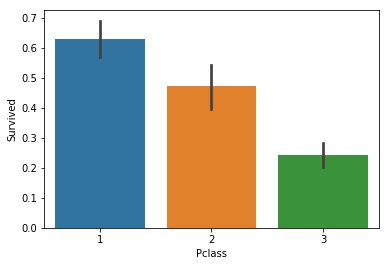

In [107]:
sns.barplot(x='Pclass', y='Survived', data=train)

In [108]:
#Conclusion: Survival rate was more with the passengers of higher class

In [109]:
#Sex vs. Survived

In [110]:
train.groupby('Sex').Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [111]:
train[['Sex','Survived']].groupby(['Sex'], as_index = False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


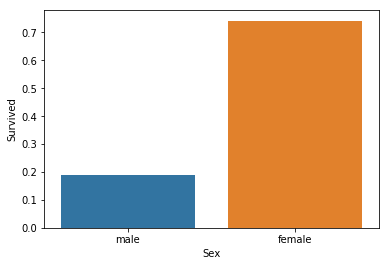

In [112]:
sns.barplot(x='Sex', y='Survived', ci=None, data = train)

In [113]:
#Conclusion: Women has more survival rate than men

In [114]:
#Pclass & sex vs. Survived

In [115]:
tab = pd.crosstab(train['Pclass'], train['Sex'])
print (tab)

Sex     female  male
Pclass              
1           94   122
2           76   108
3          144   347


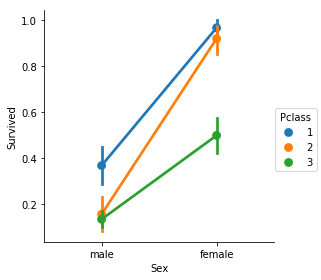

In [116]:
#Graph showing class and gender wise survival rate
sns.factorplot('Sex', 'Survived', hue='Pclass', size=4,data=train)

In [117]:
#Conclusion: Almost 100% women passengers from 1st and 2nd class have survived
#Who travelled in 3rd class mainly died amongst the women passengers
#Almost all male passengers from 2nd and 3rd class not survived

In [118]:
#Embarked vs. Survived

In [119]:
train.groupby('Embarked').Survived.value_counts()

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

In [120]:
train[['Embarked','Survived']].groupby(['Embarked'], as_index = False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


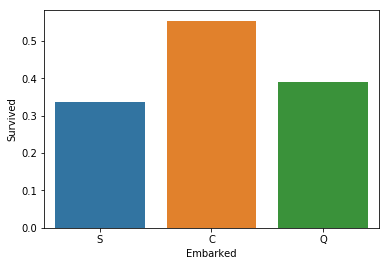

In [121]:
sns.barplot(x='Embarked', y='Survived', ci=None, data=train)

In [122]:
#Conclusion: Passengers embarked from 'C' had more survival rate

In [123]:
#Parch vs. Survived

In [124]:
train.groupby('Parch').Survived.value_counts()

Parch  Survived
0      0           445
       1           233
1      1            65
       0            53
2      0            40
       1            40
3      1             3
       0             2
4      0             4
5      0             4
       1             1
6      0             1
Name: Survived, dtype: int64

In [125]:
train[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


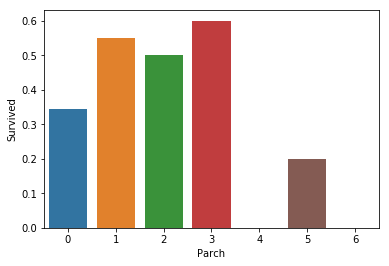

In [126]:
sns.barplot(x='Parch', y='Survived', ci=None, data=train) # ci=None will hide the error bar

In [127]:
#Parch does not have strong direct relationship with Survived

In [128]:
#SibSp vs. Survival

In [129]:
train.groupby('SibSp').Survived.value_counts()

SibSp  Survived
0      0           398
       1           210
1      1           112
       0            97
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: Survived, dtype: int64

In [130]:
train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


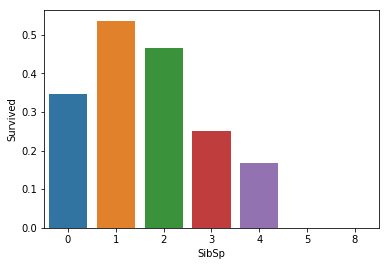

In [131]:
sns.barplot(x='SibSp', y='Survived', ci=None, data=train) # ci=None will hide the error bar

In [132]:
#Sibsp does not have strong direct relationship with Survived

In [133]:
#Age vs. Survived

In [266]:
train[['Age','Survived']].groupby(['Age'], as_index = False).mean()

,Age,Survived
0,0,0.550000
1,1,0.370690
2,2,0.349862
3,3,0.434783
4,4,0.090909


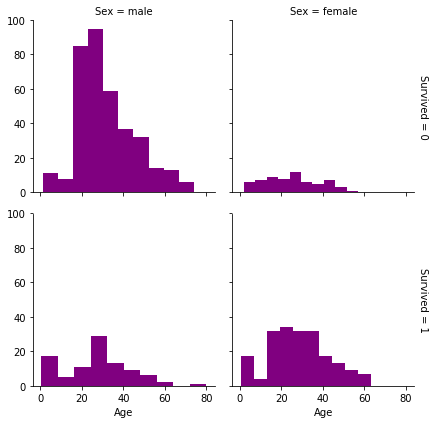

In [135]:
#To get a better understanding plotting age along with gender against survival count
g = sns.FacetGrid(train, col="Sex", row="Survived", margin_titles=True)
g.map(plt.hist, "Age",color="purple");

In [136]:
#Conclusion
#For both male and female, children with age between 0 to 5 have better chance of survival.
#Women with age between "15 to 35" have higher chance of survival.
#Men with age between 20 to 40 have better chance of survival.

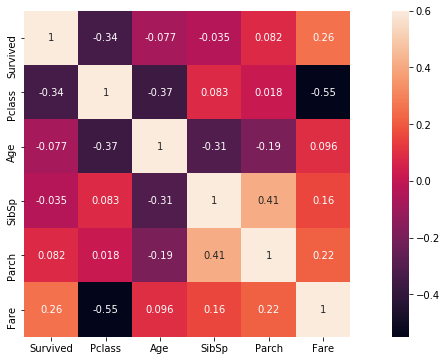

In [137]:
#Correlation between variables using heatmap:
plt.figure(figsize=(15,6))
sns.heatmap(train.drop('PassengerId',axis=1).corr(), vmax=0.6, square=True, annot=True)


In [138]:
#Feature Extraction

#Objectives:
#Select appropriate feature to train classifier
#Create new features based on existing features
#Convert categorical features to numeric features

In [139]:
#Combining training and test datasets
train_test_data = [train, test]

In [140]:
#Function to extract title from name
def title(name):
    if 'Mrs' in name:
        return 'Mrs'
    elif 'Mr' in name:
        return 'Mr'
    elif 'Miss' in name:
        return 'Miss'
    elif 'Master' in name:
        return 'Master'
    else:
        return 'Other'
    
for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].apply(lambda name: title(name))

In [141]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs


In [142]:
#Regrouping titles from 'Other' bucket further into more appropriate group
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.700000
2,Mr,0.158301
3,Mrs,0.790698
4,Other,0.375000


In [143]:
#Converting the categorical Title values into numeric form

title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Other": 5}
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

In [144]:
#Converting the categorical value of Sex into numeric. We represent 0 as female and 1 as male
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)


In [145]:
#Embarked

#Embarked has null values
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [146]:
#Value counts
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [147]:
#As max. number of passengers embarked from 'S', replacing missing embarked values with 'S'
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [ ]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [230]:
#Age

#Age has 177 null values
#Filling each NULL values of Age with a random number between (mean_age - std_age) and (mean_age + std_age)

for dataset in train_test_data:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    
train['Age'] = np.where(np.isnan(train['Age']) == True,np.random.randint((age_avg - age_std), (age_avg + age_std)),train['Age'])
test['Age'] = np.where(np.isnan(test['Age']) == True,np.random.randint((age_avg - age_std), (age_avg + age_std)),test['Age'])

train['Age'] = train['Age'].astype(int)
test['Age'] = test['Age'].astype(int)


In [231]:
#As there are too many different age values, the 'Age' variable will be categorized into 5 different age ranges

train['AgeBand'] = pd.cut(dataset['Age'], 5)

#Analysing 'AgeBand' variable
train['AgeBand'].unique() #[(-0.08, 16.0] < (16.0, 32.0] < (32.0, 48.0] < (48.0, 64.0] < (64.0, 80.0]]

#As per farebands reassigning values to 'Age' variable
#Training data
train.loc[train['Age'] <= 16, 'Age'] = 0
train.loc[(train['Age'] > 16) & (train['Age'] <= 32), 'Age'] = 1
train.loc[(train['Age'] > 32) & (train['Age'] <= 48), 'Age'] = 2
train.loc[(train['Age'] > 48) & (train['Age'] <= 64), 'Age'] = 3
train.loc[train['Age'] > 64, 'Age'] = 4
    
#Test data
test.loc[test['Age'] <= 16, 'Age'] = 0
test.loc[(test['Age'] > 16) & (test['Age'] <= 32), 'Age'] = 1
test.loc[(test['Age'] > 32) & (test['Age'] <= 48), 'Age'] = 2
test.loc[(test['Age'] > 48) & (test['Age'] <= 64), 'Age'] = 3
test.loc[test['Age'] > 64, 'Age'] = 4


In [232]:
#Age vs. Survived

train[['Age','Survived']].groupby(['Age'], as_index = False).mean()


,Age,Survived
0,0,0.550000
1,1,0.370690
2,2,0.349862
3,3,0.434783
4,4,0.090909


In [233]:
#Fare

In [234]:
#training dataset does not have any null value for fare where test dataset has one
test['Fare'] = test['Fare'].fillna(train['Fare'].median())

#As there are too many different Fare values, the 'Fare' variable will be categorized into 4 different Fare ranges
train['FareBand'] = pd.cut(dataset['Fare'], 4)

train['FareBand'].unique()  

#As per farebands reassigning values to 'Fare' variable
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

In [265]:
#Fare vs. Survived

train[['Fare','Survived']].groupby(['Fare'], as_index = False).mean()


,Fare,Survived
0,0,0.197309
1,1,0.308756
2,2,0.445415
3,3,0.581081


In [286]:
#SibSp & Parch Feature

In [287]:
#Combining SibSp & Parch feature, we create a new feature named FamilySize.

for dataset in train_test_data:
    dataset['FamilySize'] = dataset['SibSp'] +  dataset['Parch'] + 1

print (train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean())

   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000


In [288]:
#Conclusion:
#Passenger travelled alone has lower survival rate than passengers with family

In [289]:
#Training and test data set post Feature Extraction
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,0,3,0,1,0,0,1,2
1,1,1,1,2,3,1,3,2
2,1,3,1,1,1,0,2,1
3,1,1,1,2,3,0,3,2
4,0,3,0,2,1,0,1,1


In [290]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,892,3,0,2,0.0,2,1,1
1,893,3,1,2,0.0,0,3,2
2,894,2,0,3,1.0,2,1,1
3,895,3,0,1,1.0,0,1,1
4,896,3,1,1,1.0,0,3,3


In [291]:
#Feature Selection

In [ ]:
#Separating out variables which are not significant in predicting the target variable

feature_remove = ['PassengerId','Name','SibSp','Parch','Ticket','Cabin',,'AgeBand','FareBand']

#Dropping insignificant features from training data set
train = train.drop(feature_remove, axis=1)
test = test.drop(feature_remove, axis=1)

In [ ]:
test = test.drop(['Name','SibSp','Parch','Ticket','Cabin'], axis = 1)

In [295]:
train.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,0,3,0,1,0,0,1,2
1,1,1,1,2,3,1,3,2
2,1,3,1,1,1,0,2,1
3,1,1,1,2,3,0,3,2
4,0,3,0,2,1,0,1,1
5,0,3,0,2,1,2,1,1
6,0,1,0,3,3,0,1,1
7,0,3,0,0,2,0,4,5
8,1,3,1,1,1,0,3,3
9,1,2,1,0,2,1,3,2


In [ ]:
#Feature Scaling

#As the values for all the variables in both training and test dataset are lying 
#between 0 to 5, feature scaling is not needed

In [316]:
X_train = train.drop('Survived', axis=1)
y_train = train['Survived']
X_test = test.drop("PassengerId", axis=1)

In [327]:
X_train.shape, y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

In [ ]:
#Building Classification Model

In [334]:
#Logistic Regression
clm = LogisticRegression()
clm.fit(X_train, y_train)
y_pred_log_reg = clm.predict(X_test)
acu_log_reg = round( clm.score(X_train, y_train) * 100, 2)

print('Model accuracy: %.2f percent'%acu_log_reg)

Model accuracy: 81.37 percent


In [337]:
#Support Vector Machine (SVM)

clm = SVC()
clm.fit(X_train, y_train)
y_pred_log_reg = clm.predict(X_test)
acu_svc = round( clm.score(X_train, y_train) * 100, 2)

print('Model accuracy: %.2f percent'%acu_svc)

Model accuracy: 83.50 percent


In [338]:
#Random Forest

clm = RandomForestClassifier(n_estimators=100)
clm.fit(X_train, y_train)
y_pred_rf = clm.predict(X_test)
acu_rf = round( clm.score(X_train, y_train) * 100, 2)

print('Model accuracy: %.2f percent'%acu_rf)

Model accuracy: 89.00 percent


In [339]:
#Gaussian Naive Bayes

clm = GaussianNB()
clm.fit(X_train, y_train)
y_pred_gb = clm.predict(X_test)
acu_gb = round( clm.score(X_train, y_train) * 100, 2)

print('Model accuracy: %.2f percent'%acu_gb)

Model accuracy: 81.03 percent


In [340]:
#Comparing Models

model_comparison = pd.DataFrame({'Model':['Logistic Regression','SVM','Random Forest','Gaussian Naive Bayes'],
                                'Accuracy_Score':[81.37,83.50,89.00,81.03]})

In [342]:
model_comparison.sort_values(by = 'Accuracy_Score', ascending=False)

,Model,Accuracy_Score
2,Random Forest,89.00
1,SVM,83.50
0,Logistic Regression,81.37
3,Gaussian Naive Bayes,81.03


In [359]:
#Accuracy score shows Random Forest as the best fit

#Building Confusion Matrix for the predictions of the Random Forest Classifier
clm = RandomForestClassifier(n_estimators=100)
clm.fit(X_train, y_train)
y_pred_random_forest_training_set = clm.predict(X_train)
acu_random_forest = round(clm.score(X_train, y_train) * 100, 2)
print ("Accuracy: %i %% \n"%acu_random_forest)

class_names = ['Survived', 'Not Survived']

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_train, y_pred_random_forest_training_set)

print ('Confusion Matrix in Numbers')
print (cnf_matrix)

cnf_matrix_percent = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)
cnf_matrix_percent

Accuracy: 89 % 

Confusion Matrix in Numbers
[[521  28]
 [ 70 272]]


array([[0.95, 0.08],
       [0.13, 0.8 ]])

In [360]:
actual_class_names = ['Actual Survived', 'Actual Not Survived']
predicted_class_names = ['Predicted Survived', 'Predicted Not Survived']

df_cnf_matrix = pd.DataFrame(cnf_matrix, 
                             index = actual_class_names,
                             columns = predicted_class_names)

df_cnf_matrix_percent = pd.DataFrame(cnf_matrix_percent, 
                                     index = actual_class_names,
                                     columns = predicted_class_names)

In [363]:
df_cnf_matrix

,Predicted Survived,Predicted Not Survived
Actual Survived,521,28
Actual Not Survived,70,272


In [364]:
df_cnf_matrix_percent

,Predicted Survived,Predicted Not Survived
Actual Survived,0.948998,0.081871
Actual Not Survived,0.127505,0.795322


In [369]:
#Submission

submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": y_pred_rf
    })


In [370]:
submission.to_csv('submission.csv', index=False)